# Figure 6C & S5


## Import packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from sympy import symbols, solve, simplify
import seaborn as sb
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 18})

## Definitions

Function to compute the Hill coefficient of a curve z(x) fitting the curve with an Hill function

In [2]:
def model_piu(x, a, b, c):
    return c*x**a/(x**a+b**a) 

def model_meno(x, a, b,c):
    return - c*x**a/(x**a+b**a) 

def Hill_fit_piu(z,x,model, bo):
    y= z-min(z)
    yR= y/max(y)
    popt, _ = curve_fit(model, x, yR, bounds=bo)
    a,b,c = popt  
    return [round(a,8), round(b,8), round(c,8)]

def Hill_fit_meno(z,x,model, bo):
    y= z-min(z)
    yR= y/max(y) - 1
    popt, _ = curve_fit(model, x, yR, bounds=bo)
    a,b,c = popt
    return [round(a,8), round(b,8), round(c,8)]

# Model 

Definition of the parameters of the model

In [3]:
T, V1, V2, K1, K2, Kb = symbols('T V1 V2 K1 K2 Kb') 
Vs, Rb, Ks, Vrg, Qb, Krg = symbols('Vs Rb Ks Vrg Qb Krg')
R, F, Kd, Q, E, Ke = symbols('R F Kd Q E Ke')
S1, Qtot, S2, Rtot= symbols('S1 Qtot S2 Rtot')

The evolution equation for T

In [4]:
# Evolution equation for T: 
expr = V1*(1-T)/(K1+(1-T))-V2*T/(K2+T)-Kb*T
expr_simplified= V1*(1-T)*(K2+T) -V2*T*(K1+(1-T))-Kb*T*(K1+(1-T))*(K2+T)
print('Evolution equation for T:')
print(expr)

# Substitute the expression for V1 and V2 in the evolution equation for T:  
expr_RQ= expr_simplified.subs([(V1, Vs*(R*F/(Kd+F))/(Ks+(R*F/(Kd+F)))),(V2, Vrg*(Q*E/(Ke+E))/(Krg+(Q*E/(Ke+E))))])

# Substitute the expressions for Q and R
expr_S1S2 = expr_RQ.subs([(R, Rtot*S1),(Q, Qtot*S2)])

# Solve the equation 
sol = solve(expr_S1S2, T)[1]

Evolution equation for T:
-Kb*T - T*V2/(K2 + T) + V1*(1 - T)/(K1 - T + 1)


Definition of the function ExprT that compute T as a function of all the parameters of the equation

In [5]:
def exprT(Vs_v=1, Vrg_v=1, K1_v=0.5, K2_v=0.5, Krg_v=1200, Ks_v=1200, Kb_v=0.001, F_v=5, Kd_v=25, E_v=5, Ke_v=25, Rtot_v=2000, Qtot_v=2000, S1_v=0.5, S2_v=0.5):
    sol_T = sol.subs([(Vs,Vs_v),(Vrg,Vrg_v),(K1, K1_v),(K2,K2_v),(Krg, Krg_v), (Ks, Ks_v), (Kb, Kb_v),(F, F_v),(Kd, Kd_v),(E,E_v), (Ke, Ke_v),(Rtot, Rtot_v),(Qtot,Qtot_v),(S1,S1_v),(S2,S2_v)])
    sol_T = np.real(np.array(sol_T,complex))
    return sol_T

Definition of the function to compute Erk (as a function of T):

In [6]:
def Erk(T,n=2, Kerk=0.5, Erk_max=1, Erk_bas=0): 
    Erk = [ Erk_max* T[i]**n/(T[i]**n +Kerk**n)+Erk_bas for i in range(len(T)) ]
    return Erk

# Results

## Figure 6C

In [7]:
F_temp = np.logspace(-5,5,100) 
E_temp = np.logspace(-5,5,100) 

T_F = [exprT(F_v =F_temp[i], Kb_v=0.001) for i in range(len(F_temp))]
Erk_F = Erk(T_F)

# Find the Hill coefficients of the curves Erk(FGF) 
n_F_fit= Hill_fit_piu(Erk_F, F_temp, model_piu, bo=((0,0,0),(20,10000,1)))[0] 

T_E = [exprT(E_v =E_temp[i],Kb_v=0.001) for i in range(len(E_temp))]
Erk_E = Erk(T_E)

# Find the Hill coefficients of the curves Erk(FGF) 
n_E_fit= Hill_fit_meno(Erk_E, E_temp, model_meno, bo=((0,0,0),(10,5000,1)))[0]  

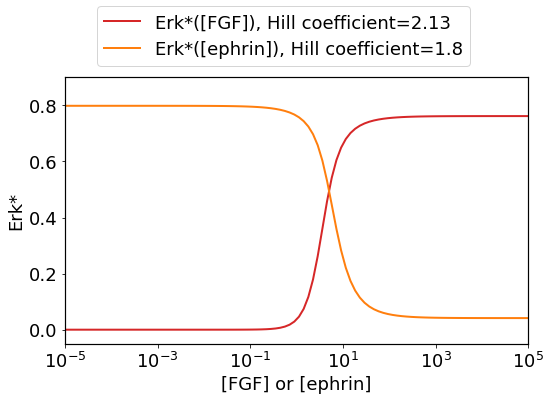

In [19]:
plt.figure(figsize=(8,6.2))
plt.plot(F_temp, Erk_F, color='tab:red',linewidth=2,label=f'Erk*([FGF]), Hill coefficient={np.round(n_F_fit,2)}')
plt.plot(E_temp, Erk_E, color='tab:orange',linewidth=2,label=f'Erk*([ephrin]), Hill coefficient={np.round(n_E_fit,2)}')
plt.xscale('log')
plt.ylabel('Erk*')
plt.xlabel('[FGF] or [ephrin]')
plt.legend(ncol=1, loc='upper left', bbox_to_anchor=(0.05, 1.3))
plt.xlim([10**(-5),10**(5)])
plt.ylim([-0.05,0.9])

ax=plt.gca()
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)
        
plt.tight_layout()
plt.show()

## Figure S5

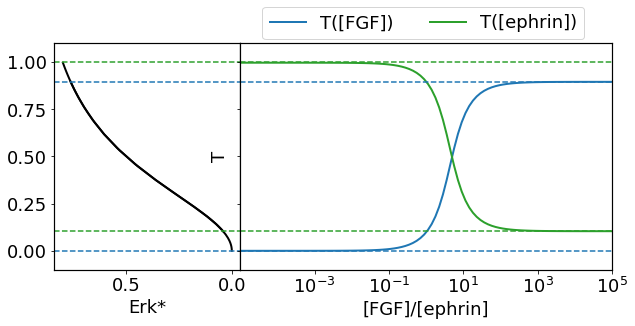

In [9]:
fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(1,2,hspace=0, wspace=0, width_ratios= [1, 2])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.plot(Erk_E,T_E,color='k', linewidth=2)
ax1.plot(Erk_F,T_F,color='k', linewidth=2)
ax1.axhline(y=0, color='tab:blue', linestyle='--')
ax1.axhline(y=1, color='tab:green', linestyle='--')
ax1.axhline(y= min(T_E), color='tab:green', linestyle='--')
ax1.axhline(y= max(T_F), color='tab:blue', linestyle='--')

ax=ax1
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)
        
ax1.invert_xaxis()
ax1.set_ylim([-0.1,1.1])
ax1.set_xlabel('Erk*')

ax2.plot(E_temp,T_F, label=f'T([FGF])', linewidth=2)
ax2.plot(E_temp,T_E, label=f'T([ephrin])', color='tab:green', linewidth=2)

ax2.axhline(y=0, color='tab:blue', linestyle='--')
ax2.axhline(y=1, color='tab:green', linestyle='--')
ax2.axhline(y= min(T_E), color='tab:green', linestyle='--')
ax2.axhline(y= max(T_F), color='tab:blue', linestyle='--')

ax2.set_xscale('log', base=10)
ax2.set_xlim([10**(-5),10**(5)])
ax2.set_xticks([10**(-3), 10**(-1), 10**(1), 10**(3), 10**(5)])
ax2.set_yticklabels('')
ax2.set_ylabel('T')

ax2.legend(ncol=2, bbox_to_anchor=(0.95, 1.2))
ax2.set_ylim([-0.1,1.1])
ax2.set_xlabel('[FGF]/[ephrin]')

ax=ax2
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)

plt.tight_layout()
plt.show()